In [3]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [5]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = "Resources/lending_data.csv"
df= pd.read_csv(file_path)
# Review the DataFrame
print(df.shape)
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


#### Review dataset Loand to determine Preprocesing (imputation, encoding, scaler)

In [6]:
# General information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


##### * Do not need to imputaton or encoding because all column are numerical. 

In [7]:
# the columns of  Data Frame
print( df.columns)

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')


In [8]:
# Describe 
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


* Based on the description, we need to apply a scaler because the previous table indicates significant variation among the features (X).





### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

##### Before create y and X:
###### Feature selection methods

In [9]:
# Correlation analysis
corrs = df_lending.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


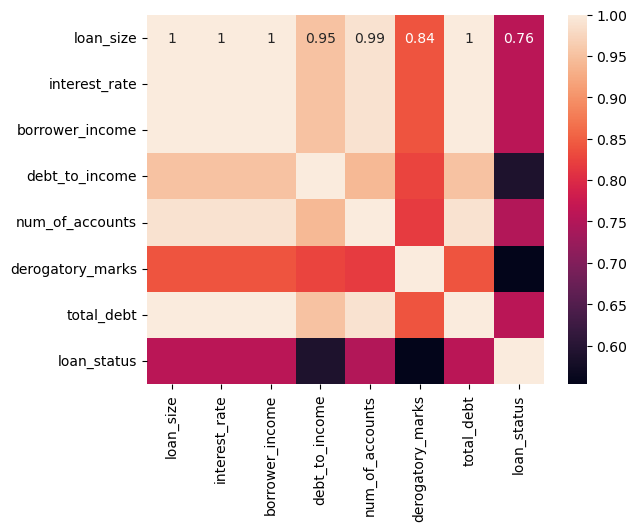

In [10]:
sns.heatmap(corrs, annot=True)
plt.show()

In [11]:
abs(corrs.loan_status).sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

In [12]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
X = df.drop("loan_status", axis=1)

# Display the shapes of the y and X variables
print("Shape of y (labels):", y.shape)
print("Shape of X (features):", X.shape)

Shape of y (labels): (77536,)
Shape of X (features): (77536, 7)


In [13]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [14]:
# Review the X variable DataFrame (features)X[:5]
X[:5]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [15]:
# Check the balance of the target values
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

##### * The imbalance is dramatically severe.  The Loan status of 1 is around 3.33%, it is a low sample class . It will be probably our models that will be bad. 

In [16]:
# SCALE the NUMERIC Features FIRST

# subset
# Subset the DataFrame using the column names from X
df_sub = df[X.columns]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data,columns=X.columns)

df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [17]:
df_scaled.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,7.753600e+04,77536.000000,7.753600e+04,7.753600e+04,7.753600e+04,77536.000000
mean,0.000000,-1.407596e-15,0.000000,-1.196457e-15,-4.691987e-17,-5.864983e-17,0.000000
std,1.000006,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006
min,-2.295787,-2.296073e+00,-2.296096,-4.628640e+00,-2.009337e+00,-6.739731e-01,-2.296096
25%,-0.528166,-5.253942e-01,-0.528210,-5.760741e-01,-4.340494e-01,-6.739731e-01,-0.528210
50%,-0.145978,-1.352827e-01,-0.134019,-1.249033e-02,9.104661e-02,-6.739731e-01,-0.134019
75%,0.283984,2.649469e-01,0.260172,4.787266e-01,9.104661e-02,1.043996e+00,0.260172
max,6.685636,6.680987e+00,6.686676,4.140328e+00,6.392198e+00,4.479933e+00,6.686676


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [18]:
#  Get the data
X = df_scaled
y = df.loan_status

In [19]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Display the shapes of the training and testing sets (myself)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (58152, 7)
Shape of X_test: (19384, 7)
Shape of y_train: (58152,)
Shape of y_test: (19384,)


---

## Create a Logistic Regression Model with the Original Data

#### This part work on three steps are following:

##### * **Step 1:** Fit a logistic regression model by using the training data (`X_train` and `y_train`).

##### * **Step 2:** Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

##### * **Step 3:** Evaluate the model’s performance by doing the following:
***- Generate a confusion matrix.*
***- Print the classification report.* 

In [21]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

#### Logistic Regression Model: 

TRAIN METRICS
    Confusion Matrix: 
    [[55974   297]
 [   35  1846]]
    
    AUC: 0.9951738733470746

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.98      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18652   113]
 [   10   609]]
    
    AUC: 0.9939249462035111

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.98      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    


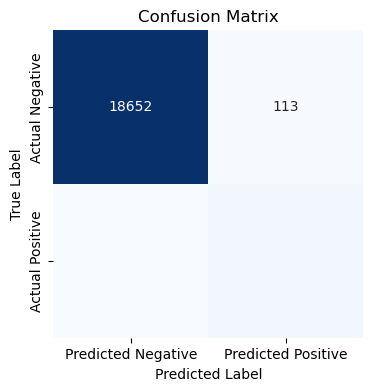

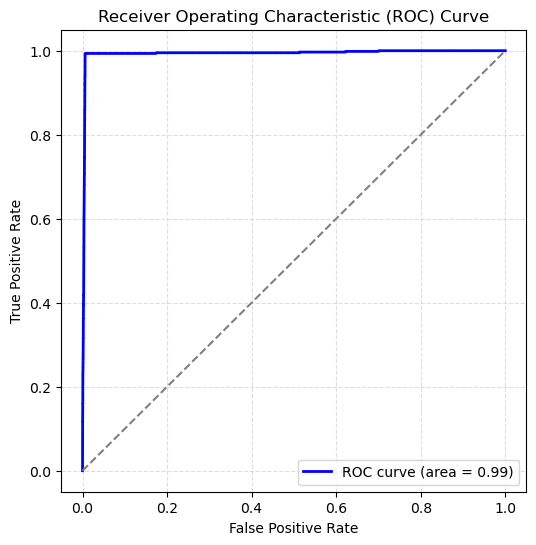

In [22]:
# Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

#### Other Models: 

##### Decision Tree(dt)

TRAIN METRICS
    Confusion Matrix: 
    [[56206    65]
 [   78  1803]]
    
    AUC: 0.9998746383310181

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.97      0.96      0.96      1881

    accuracy                           1.00     58152
   macro avg       0.98      0.98      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18668    97]
 [   91   528]]
    
    AUC: 0.9493988008300953

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.84      0.85      0.85       619

    accuracy                           0.99     19384
   macro avg       0.92      0.92      0.92     19384
weighted avg       0.99      0.99      0.99     19384

    


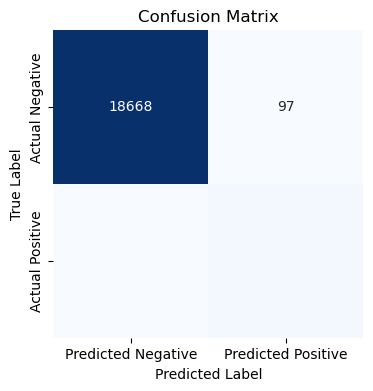

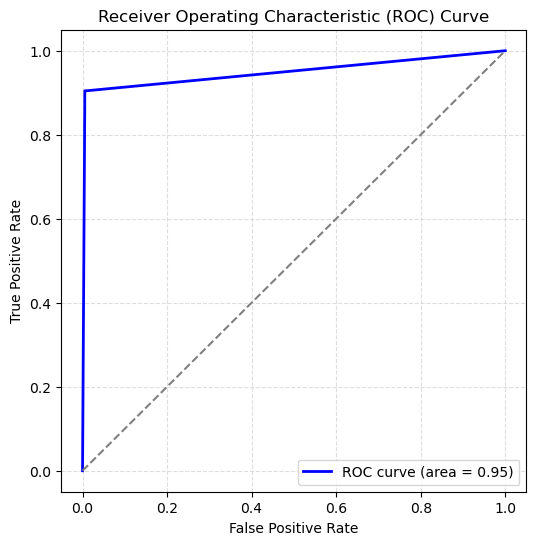

In [23]:
# Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

##### Randomm Forest (rf)

TRAIN METRICS
    Confusion Matrix: 
    [[56155   116]
 [   28  1853]]
    
    AUC: 0.9998464463632555

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.94      0.99      0.96      1881

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18666    99]
 [   65   554]]
    
    AUC: 0.9937745441772592

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.89      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384

    


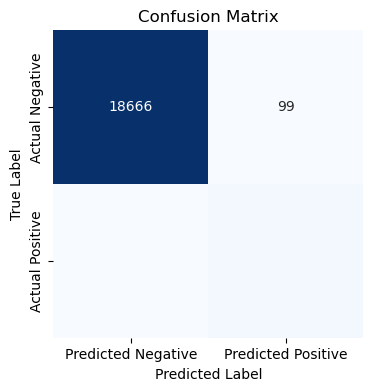

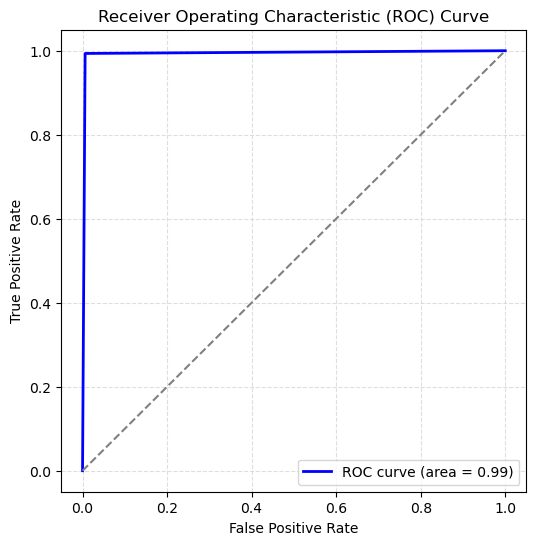

In [24]:
# Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

#####  Suport Vector Machine - SVM in this noteboook it is called (svc)

TRAIN METRICS
    Confusion Matrix: 
    [[55966   305]
 [    9  1872]]
    
    AUC: 0.9958136722937513

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      1.00      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18649   116]
 [    4   615]]
    
    AUC: 0.9936024470676555

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    


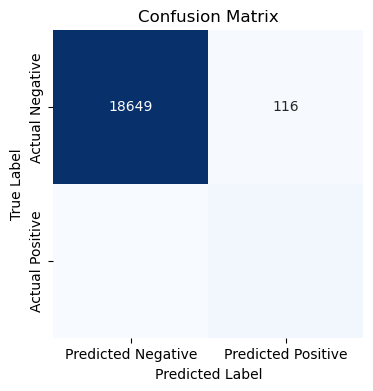

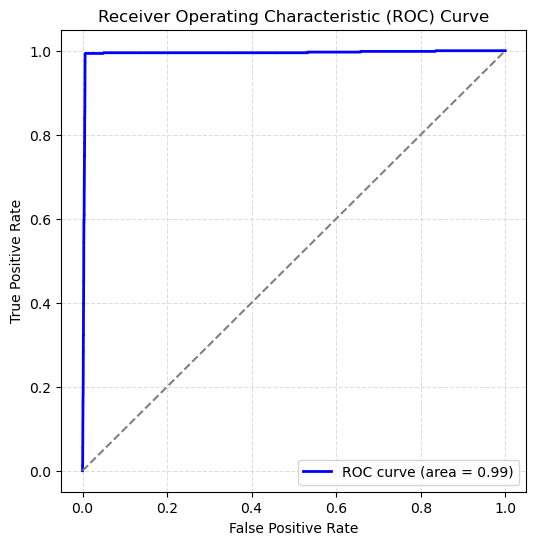

In [25]:
# Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

##### k-Nearest Neighbor (kNN)

TRAIN METRICS
    Confusion Matrix: 
    [[55968   303]
 [   11  1870]]
    
    AUC: 0.9972965187804279

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.99      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18650   115]
 [    4   615]]
    
    AUC: 0.9937726932078461

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    


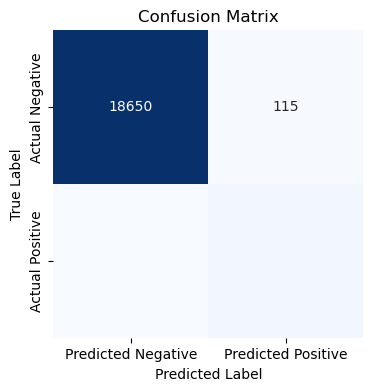

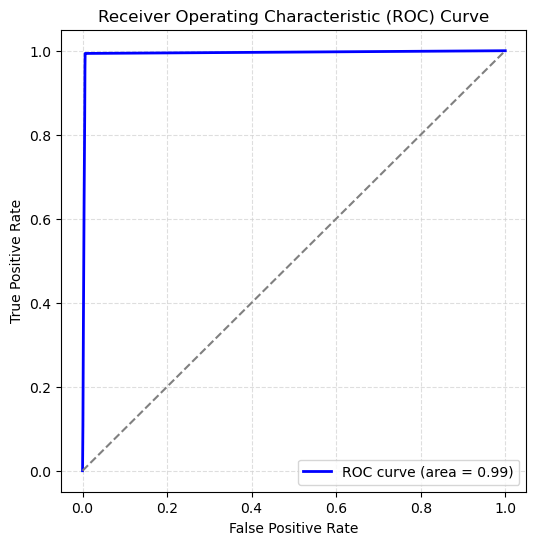

In [26]:
# Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

##### Extra Trees (et)

TRAIN METRICS
    Confusion Matrix: 
    [[56206    65]
 [   78  1803]]
    
    AUC: 0.9998746383310181

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.97      0.96      0.96      1881

    accuracy                           1.00     58152
   macro avg       0.98      0.98      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18667    98]
 [   80   539]]
    
    AUC: 0.9679629048511325

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.87      0.86       619

    accuracy                           0.99     19384
   macro avg       0.92      0.93      0.93     19384
weighted avg       0.99      0.99      0.99     19384

    


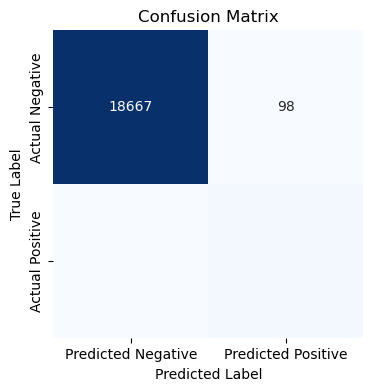

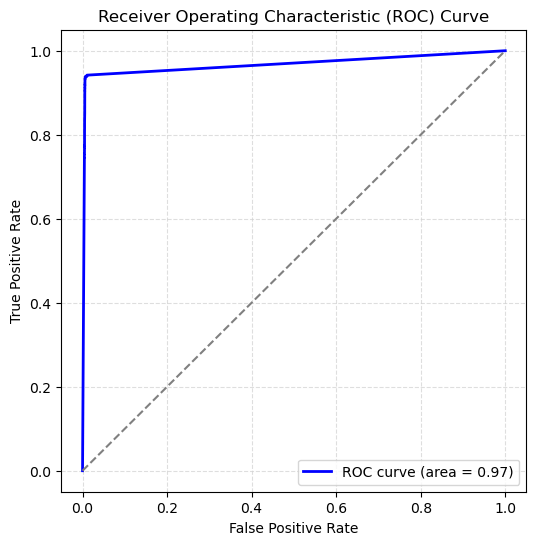

In [27]:
# Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

##### Ada Boost (ad)

TRAIN METRICS
    Confusion Matrix: 
    [[55967   304]
 [    9  1872]]
    
    AUC: 0.9972928200018156

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      1.00      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18650   115]
 [    4   615]]
    
    AUC: 0.9945915965127735

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    


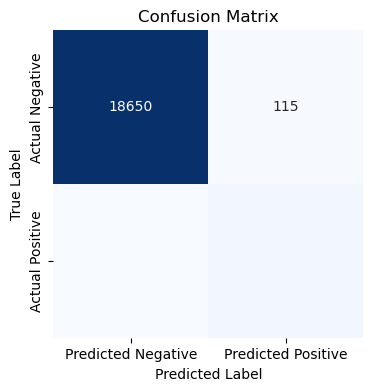

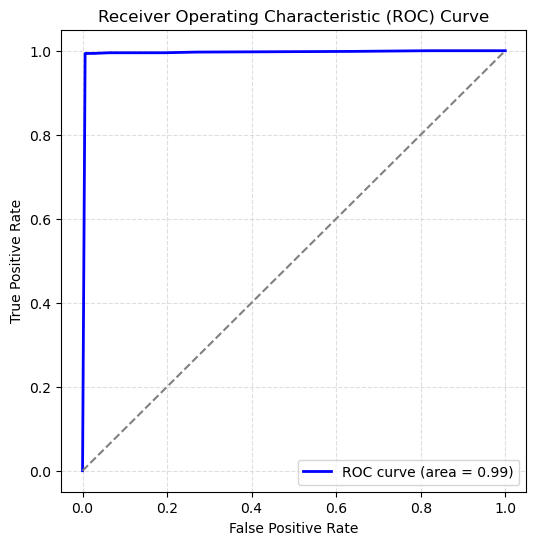

In [28]:
# Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

##### Gradient Boosting

TRAIN METRICS
    Confusion Matrix: 
    [[55980   291]
 [    8  1873]]
    
    AUC: 0.9984348970229328

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.87      1.00      0.93      1881

    accuracy                           0.99     58152
   macro avg       0.93      1.00      0.96     58152
weighted avg       1.00      0.99      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18652   113]
 [    6   613]]
    
    AUC: 0.99437232120604

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    


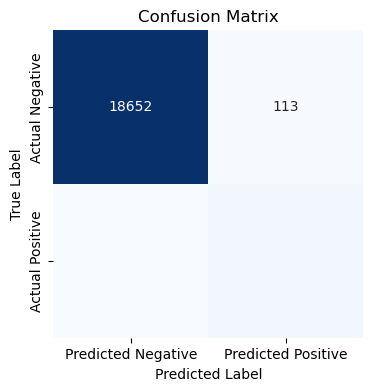

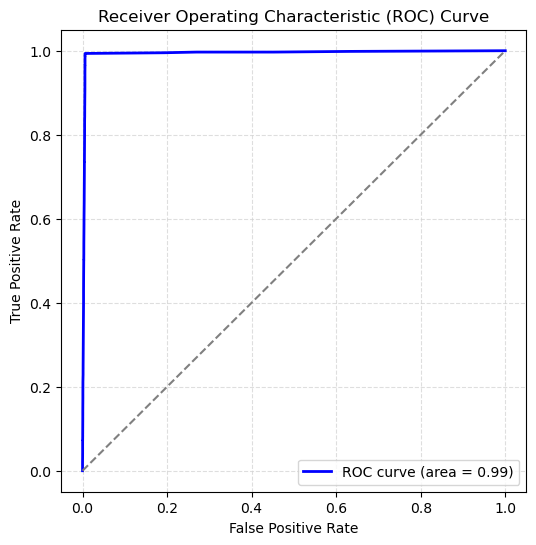

In [29]:
# Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

#####  XGBoost (xgb)

In [31]:
from xgboost import XGBClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[55969   302]
 [   11  1870]]
    
    AUC: 0.9981085967258148

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.99      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18651   114]
 [    5   614]]
    
    AUC: 0.9942855839184334

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    


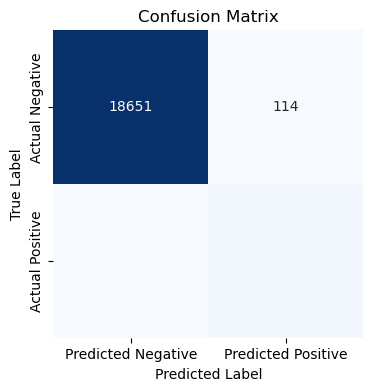

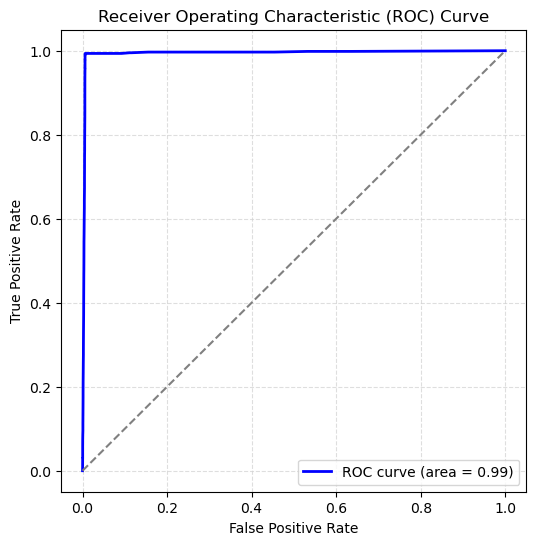

In [32]:
# Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

##### Light GBM models (lgbm)

In [34]:
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[55972   299]
 [   13  1868]]
    
    AUC: 0.9983066679738519

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.99      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18651   114]
 [    5   614]]
    
    AUC: 0.9947741967976508

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    


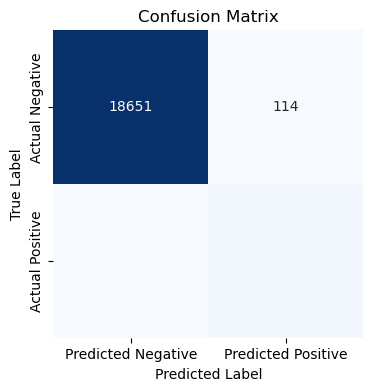

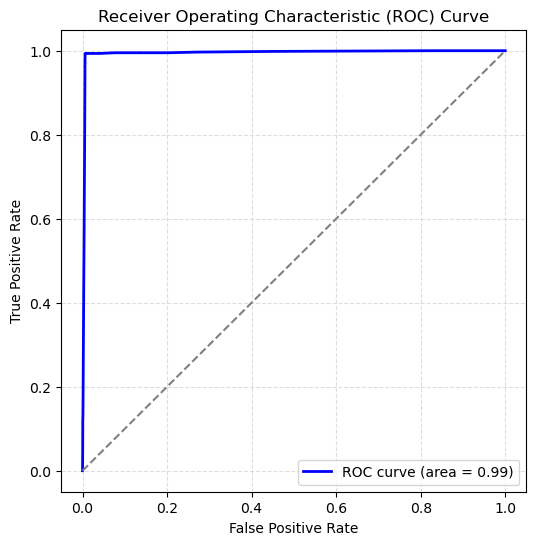

In [35]:
# Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model's effectiveness in predicting both 0 (healthy loan) and 1 (high-risk loan) labels can lead to imbalances in precision and recall. While it may accurately classify both categories, metrics such as accuracy, precision, and recall for each class can highlight notable differences in performance.

---